<a href="https://colab.research.google.com/github/Lin8823/Lin/blob/main/Heart%20Disease/NN_model/NN_model_(with_similarity).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Input, Dense, SimpleRNN, RNN
from keras.layers import LSTM
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from matplotlib import pyplot as plt

In [ ]:
!wget https://raw.githubusercontent.com/Lin8823/Lin/main/Data/heart.csv

--2022-01-18 17:14:28--  https://raw.githubusercontent.com/Lin8823/Lin/main/Data/heart.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11328 (11K) [text/plain]
Saving to: ‘heart.csv’

heart.csv           100%[===================>]  11.06K  --.-KB/s    in 0s      

2022-01-18 17:14:28 (50.3 MB/s) - ‘heart.csv’ saved [11328/11328]



In [ ]:
heart = pd.read_csv("heart.csv", encoding="utf-8")
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
MinMaxScaler = preprocessing.MinMaxScaler(feature_range=(0,1)) #使用Min-Max Normalization將data標準化至0-1間
MinMax_data = MinMaxScaler.fit_transform(heart)
heart = pd.DataFrame(MinMax_data, columns=["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"])
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.00,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.00,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.00,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.00,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.00,0.666667,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.000000,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.5,0.00,1.000000,0.0
299,0.333333,1.0,1.000000,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.5,0.00,1.000000,0.0
300,0.812500,1.0,0.000000,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.548387,0.5,0.50,1.000000,0.0
301,0.583333,1.0,0.000000,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.5,0.25,1.000000,0.0


###將患有與未患有心血管疾病的資料分割

In [ ]:
heart_disease = heart.iloc[0:165]
non_disease = heart.iloc[165:]

In [ ]:
feature_heart_disease = heart_disease.drop("num",axis=1)
feature_non_disease = non_disease.drop("num",axis=1)
target_heart = heart["num"]
# heart_train,heart_test,heart1_train,heart1_test = train_test_split(feature_heart,target_heart,test_size=0.20,random_state=0)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encode', OneHotEncoder(), [0])], remainder='passthrough') #transformers[(名字，方式，要取代的欄位)=>使用tuple呈現，再用list包著，remainder=>其他的欄位]
y = np.array(ct.fit_transform(pd.DataFrame(target_heart))) #使用fit_transform將fit和transform同時完成
#[0,1]代表患有心血管疾病、[1,0]則無

###將目標變數切割

In [ ]:
target_heart_disease = y[0:165]
target_non_disease = y[165:]

In [ ]:
def plot_the_loss_curve(epochs, mse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Mean Squared Error")

  plt.plot(epochs, mse, label="Loss")
  plt.legend()
  plt.ylim([mse.min()*0.95, mse.max() * 1.03])
  plt.show()  

print("Defined the plot_the_loss_curve function.")

Defined the plot_the_loss_curve function.


Epoch 1/40
121/121 [==============================] - 1s 2ms/step - loss: 0.6882 - binary_accuracy: 0.5744
Epoch 2/40
121/121 [==============================] - 0s 2ms/step - loss: 0.6233 - binary_accuracy: 0.7355
Epoch 3/40
121/121 [==============================] - 0s 2ms/step - loss: 0.5241 - binary_accuracy: 0.7934
Epoch 4/40
121/121 [==============================] - 0s 1ms/step - loss: 0.4532 - binary_accuracy: 0.8017
Epoch 5/40
121/121 [==============================] - 0s 1ms/step - loss: 0.4192 - binary_accuracy: 0.8099
Epoch 6/40
121/121 [==============================] - 0s 2ms/step - loss: 0.3975 - binary_accuracy: 0.8182
Epoch 7/40
121/121 [==============================] - 0s 2ms/step - loss: 0.3820 - binary_accuracy: 0.8264
Epoch 8/40
121/121 [==============================] - 0s 1ms/step - loss: 0.3665 - binary_accuracy: 0.8430
Epoch 9/40
121/121 [==============================] - 0s 2ms/step - loss: 0.3588 - binary_accuracy: 0.8430
Epoch 10/40
121/121 [================

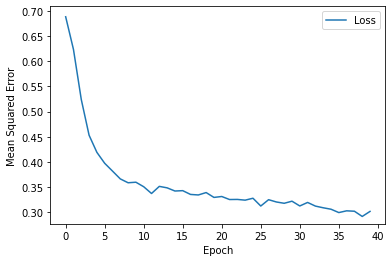

2/2 [==============================] - 0s 7ms/step - loss: 0.4491 - binary_accuracy: 0.8361
Test loss: 0.44910159707069397
Test accuracy: 0.8360655903816223
Epoch 1/40
121/121 [==============================] - 1s 1ms/step - loss: 0.6407 - binary_accuracy: 0.6736
Epoch 2/40
121/121 [==============================] - 0s 2ms/step - loss: 0.5263 - binary_accuracy: 0.7686
Epoch 3/40
121/121 [==============================] - 0s 2ms/step - loss: 0.4626 - binary_accuracy: 0.7934
Epoch 4/40
121/121 [==============================] - 0s 2ms/step - loss: 0.4415 - binary_accuracy: 0.7810
Epoch 5/40
121/121 [==============================] - 0s 1ms/step - loss: 0.4255 - binary_accuracy: 0.8058
Epoch 6/40
121/121 [==============================] - 0s 1ms/step - loss: 0.4213 - binary_accuracy: 0.8223
Epoch 7/40
121/121 [==============================] - 0s 1ms/step - loss: 0.4071 - binary_accuracy: 0.8264
Epoch 8/40
121/121 [==============================] - 0s 2ms/step - loss: 0.4096 - binary_accu

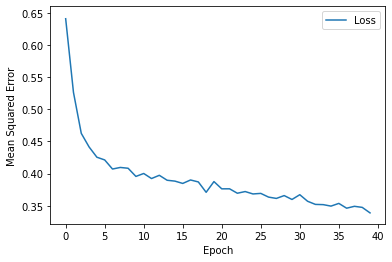

2/2 [==============================] - 0s 5ms/step - loss: 0.3718 - binary_accuracy: 0.8852
Test loss: 0.37177813053131104
Test accuracy: 0.8852459192276001
Epoch 1/40
121/121 [==============================] - 1s 1ms/step - loss: 0.6848 - binary_accuracy: 0.5826
Epoch 2/40
121/121 [==============================] - 0s 1ms/step - loss: 0.5819 - binary_accuracy: 0.7025
Epoch 3/40
121/121 [==============================] - 0s 1ms/step - loss: 0.4960 - binary_accuracy: 0.7603
Epoch 4/40
121/121 [==============================] - 0s 1ms/step - loss: 0.4432 - binary_accuracy: 0.7810
Epoch 5/40
121/121 [==============================] - 0s 2ms/step - loss: 0.4081 - binary_accuracy: 0.8347
Epoch 6/40
121/121 [==============================] - 0s 1ms/step - loss: 0.3934 - binary_accuracy: 0.8058
Epoch 7/40
121/121 [==============================] - 0s 2ms/step - loss: 0.3895 - binary_accuracy: 0.8182
Epoch 8/40
121/121 [==============================] - 0s 2ms/step - loss: 0.3797 - binary_accu

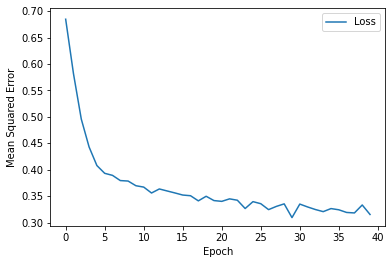

2/2 [==============================] - 0s 7ms/step - loss: 0.4452 - binary_accuracy: 0.8033
Test loss: 0.4452279806137085
Test accuracy: 0.8032786846160889
Epoch 1/40
122/122 [==============================] - 1s 2ms/step - loss: 0.6760 - binary_accuracy: 0.5638
Epoch 2/40
122/122 [==============================] - 0s 2ms/step - loss: 0.5946 - binary_accuracy: 0.7078
Epoch 3/40
122/122 [==============================] - 0s 2ms/step - loss: 0.5133 - binary_accuracy: 0.7901
Epoch 4/40
122/122 [==============================] - 0s 2ms/step - loss: 0.4502 - binary_accuracy: 0.8107
Epoch 5/40
122/122 [==============================] - 0s 2ms/step - loss: 0.4077 - binary_accuracy: 0.8066
Epoch 6/40
122/122 [==============================] - 0s 1ms/step - loss: 0.4161 - binary_accuracy: 0.8189
Epoch 7/40
122/122 [==============================] - 0s 2ms/step - loss: 0.4110 - binary_accuracy: 0.8354
Epoch 8/40
122/122 [==============================] - 0s 1ms/step - loss: 0.3883 - binary_accur

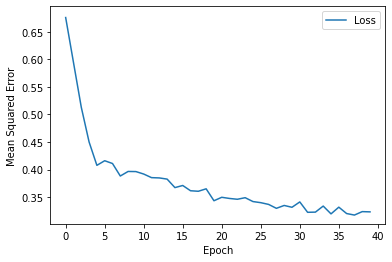

2/2 [==============================] - 0s 6ms/step - loss: 0.3817 - binary_accuracy: 0.8833
Test loss: 0.38173797726631165
Test accuracy: 0.8833333253860474
Epoch 1/40
122/122 [==============================] - 1s 2ms/step - loss: 0.6711 - binary_accuracy: 0.6029
Epoch 2/40
122/122 [==============================] - 0s 2ms/step - loss: 0.6030 - binary_accuracy: 0.7449
Epoch 3/40
122/122 [==============================] - 0s 2ms/step - loss: 0.5355 - binary_accuracy: 0.7654
Epoch 4/40
122/122 [==============================] - 0s 2ms/step - loss: 0.4497 - binary_accuracy: 0.8066
Epoch 5/40
122/122 [==============================] - 0s 2ms/step - loss: 0.3952 - binary_accuracy: 0.8189
Epoch 6/40
122/122 [==============================] - 0s 2ms/step - loss: 0.3656 - binary_accuracy: 0.8313
Epoch 7/40
122/122 [==============================] - 0s 1ms/step - loss: 0.3574 - binary_accuracy: 0.8436
Epoch 8/40
122/122 [==============================] - 0s 1ms/step - loss: 0.3461 - binary_accu

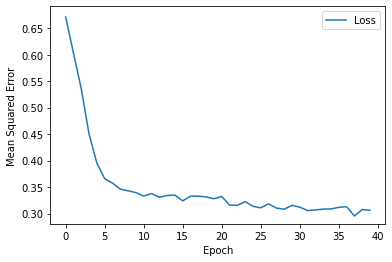

2/2 [==============================] - 0s 8ms/step - loss: 0.6511 - binary_accuracy: 0.7500
Test loss: 0.6510881781578064
Test accuracy: 0.75
[0.8360655903816223, 0.8852459192276001, 0.8032786846160889, 0.8833333253860474, 0.75]


0.8315847039222717

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5) #k-fold
test_score_list = []
for disease_index, non_disease_index in zip(kf.split(feature_heart_disease), kf.split(feature_non_disease)): #確保k-fold中，每一份資料集皆含有相近比例的"罹患"與"非罹患"心血管疾病的資料
  #以下為資料切割
  heart_disease_train, heart_disease_test = feature_heart_disease.iloc[disease_index[0]], feature_heart_disease.iloc[disease_index[1]]
  heart_disease1_train, heart_disease1_test = target_heart_disease[disease_index[0]], target_heart_disease[disease_index[1]]
  non_disease_train, non_disease_test = feature_non_disease.iloc[non_disease_index[0]], feature_non_disease.iloc[non_disease_index[1]]
  non_disease1_train, non_disease1_test = target_non_disease[non_disease_index[0]], target_non_disease[non_disease_index[1]]
  #"罹患"與"非罹患"資料合併
  heart_train = pd.concat([heart_disease_train, non_disease_train])
  heart_test = pd.concat([heart_disease_test, non_disease_test])
  heart1_train = np.vstack([heart_disease1_train,non_disease1_train])
  heart1_test = np.vstack([heart_disease1_test,non_disease1_test])

  #NN_model建立
  inputs = keras.Input(shape=(13))
  dense = layers.Dense(8, activation="relu")(inputs) 
  x = layers.Dense(5, activation="relu")(dense)
  outputs = layers.Dense(2,activation="softmax")(x) 
  model = keras.Model(inputs=inputs, outputs=outputs, name="NN")
  model.compile(
      loss=keras.losses.CategoricalCrossentropy(),
      optimizer=keras.optimizers.RMSprop(learning_rate=0.003),
      metrics=["binary_accuracy"]
  )

  history = model.fit(heart_train, heart1_train, batch_size=2, epochs=40) 
  epochs = history.epoch
  hist = pd.DataFrame(history.history)
  mse = hist["loss"]
  plot_the_loss_curve(epochs, mse)
  test_scores = model.evaluate(heart_test, heart1_test)
  test_score_list.append(test_scores[1])
  print("Test loss:", test_scores[0])
  print("Test accuracy:", test_scores[1])
print(test_score_list)
np.mean(test_score_list)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
data = [20, 0, 0, 120, 118, 1, 1, 150, 0, 2.3, 1, 0, 3]
df1['similarity']=df1.apply(lambda x: float(cosine_similarity([data], [list(x)])),axis=1)
df1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,similarity
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,0.950693
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,0.959587
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,0.977475
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,0.955723
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,0.877314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,45.0,1.0,3.0,110.0,264.0,0.0,1.0,132.0,0.0,1.2,1.0,0.0,3.0,0.903249
300,68.0,1.0,0.0,144.0,193.0,1.0,1.0,141.0,0.0,3.4,1.0,2.0,3.0,0.962446
301,57.0,1.0,0.0,130.0,131.0,0.0,1.0,115.0,1.0,1.2,1.0,1.0,3.0,0.971845
302,57.0,0.0,1.0,130.0,236.0,0.0,0.0,174.0,0.0,0.0,1.0,1.0,2.0,0.958658


In [ ]:
model.predict(heart_test)

array([[9.6560813e-02, 9.0343916e-01],
       [2.9151630e-01, 7.0848370e-01],
       [2.0964399e-02, 9.7903562e-01],
       [6.0902856e-02, 9.3909711e-01],
       [2.6066372e-02, 9.7393358e-01],
       [1.4447111e-01, 8.5552889e-01],
       [1.2204396e-01, 8.7795603e-01],
       [5.3294878e-02, 9.4670510e-01],
       [5.5952552e-03, 9.9440479e-01],
       [4.7614168e-02, 9.5238584e-01],
       [2.1739636e-01, 7.8260362e-01],
       [3.7596799e-03, 9.9624026e-01],
       [6.3884914e-02, 9.3611509e-01],
       [1.2203745e-01, 8.7796253e-01],
       [1.0679467e-03, 9.9893206e-01],
       [1.7539186e-02, 9.8246080e-01],
       [3.6361734e-03, 9.9636382e-01],
       [8.0456294e-02, 9.1954368e-01],
       [1.7871450e-01, 8.2128543e-01],
       [2.8234998e-02, 9.7176504e-01],
       [5.9617120e-01, 4.0382886e-01],
       [1.9149743e-02, 9.8085028e-01],
       [6.8444937e-02, 9.3155509e-01],
       [4.3008491e-02, 9.5699155e-01],
       [1.9585222e-02, 9.8041475e-01],
       [9.9201508e-02, 9.